In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

from matplotlib import pyplot
import itertools

%matplotlib inline

import random 
  
random.seed(42) 

In [ ]:
# Helper function that allows you to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [ ]:
def draw_3var_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)
! ls
cupid = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Cupid_Data/profiles_processed_data.csv')


Mounted at /content/gdrive/
gdrive	sample_data


In [ ]:
cupid.describe()

,body_type,drinks,drugs,height,income,orientation,sex,smokes,status,record,new_sign,new_religion,age
count,23742.000000,23742.000000,23742.000000,23742.000000,23742.000000,23742.000000,23742.000000,23742.000000,23742.000000,23742.000000,23742.000000,23742.000000,23742.000000
mean,4.974813,2.839946,1.206891,68.196951,25011.899419,1.390574,1.411423,1.488164,1.176817,30361.794668,6.475444,4.167088,33.265100
std,2.300229,0.759806,0.428628,3.954892,105150.184304,0.961480,0.492102,1.104615,0.650879,17515.564321,3.377759,2.859354,10.337491
min,1.000000,1.000000,1.000000,3.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,18.000000
25%,3.000000,3.000000,1.000000,65.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,15103.750000,4.000000,2.000000,26.000000
50%,4.000000,3.000000,1.000000,68.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,30694.500000,6.000000,3.000000,30.000000
75%,6.000000,3.000000,1.000000,71.000000,20000.000000,1.000000,2.000000,1.000000,1.000000,45371.500000,9.000000,6.000000,38.000000
max,12.000000,6.000000,3.000000,95.000000,1000000.000000,4.000000,2.000000,5.000000,5.000000,60550.000000,12.000000,9.000000,69.000000


In [ ]:
cupid_df = cupid

#need sex versus drink, smoke, status
cupid_df1 = cupid[["drinks", "smokes", "status","drugs","body_type","status","new_religion","age", "sex"]]
#need all
cupid_df3 = cupid[["body_type",	"drinks",	"drugs",	"height",	"orientation",	"sex",	"smokes",	"status",		"new_sign",	"new_religion",	"age"]]



In [ ]:
model = KMeans(n_clusters = 3)
model.fit(cupid_df1)
labels = model.predict(cupid_df1)

print(labels)



[0 2 0 ... 0 2 0]


Text(0, 0.5, 'smokes')

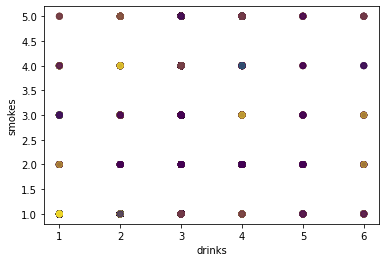

In [ ]:
x = cupid_df1["drinks"]
y = cupid_df1["smokes"]

plt.scatter(x, y, c=labels, alpha=0.5)
 
plt.xlabel('drinks')
plt.ylabel('smokes')

In [ ]:
label = "sex"
y = cupid_df1[label]
x = cupid_df1.drop(label, axis=1)
#print(y)
#print(x)

In [ ]:
train, test, target, target_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(train, target)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
##WITH FLAGS
from sklearn import metrics
gauss_pred = gauss.predict(test)
gauss_pred1 = gauss.predict(train)
score1 = metrics.accuracy_score(target_test, gauss_pred)
score2 = metrics.accuracy_score(target, gauss_pred1)
print(score1)
print(score2)


0.661799803453601
0.6490161862927974


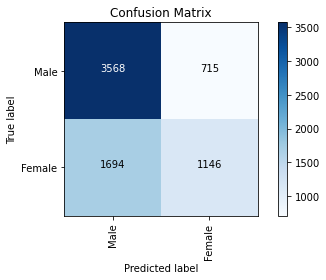

In [ ]:
draw_confusion_matrix(target_test, gauss_pred, ['Male', 'Female'])

0.8306893162993121
0.8350682953246285


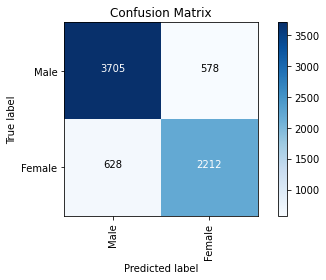

In [ ]:
label = "sex"
y = cupid_df3[label]
x = cupid_df3.drop(label, axis=1)
train, test, target, target_test = train_test_split(x, y, test_size=0.3, random_state=0)

from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(train, target)

##WITH FLAGS
from sklearn import metrics
gauss_pred = gauss.predict(test)
gauss_pred1 = gauss.predict(train)
score1 = metrics.accuracy_score(target_test, gauss_pred)
score2 = metrics.accuracy_score(target, gauss_pred1)
print(score1)
print(score2)

draw_confusion_matrix(target_test, gauss_pred, ['Male', 'Female'])

0.08535729327530535
0.09441001263613936


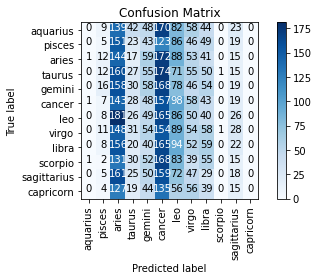

In [ ]:
label = "new_sign"
y = cupid_df3[label]
x = cupid_df3.drop(label, axis=1)
train, test, target, target_test = train_test_split(x, y, test_size=0.3, random_state=0)

from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(train, target)

##WITH FLAGS
from sklearn import metrics
gauss_pred = gauss.predict(test)
gauss_pred1 = gauss.predict(train)
score1 = metrics.accuracy_score(target_test, gauss_pred)
score2 = metrics.accuracy_score(target, gauss_pred1)
print(score1)
print(score2)

draw_confusion_matrix(target_test, gauss_pred, ["aquarius", "pisces", "aries", "taurus", "gemini", "cancer", "leo", "virgo", "libra", "scorpio", "sagittarius",  "capricorn"])